# Introdução à Data Science com Python - Data ICMC-USP

Esse material foi desenvolvido pelo Data, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP.

Esse notebook é acompanhado de um curso em video, que pode ser encontrado em [aqui](https://www.youtube.com/playlist?list=PLFE-LjWAAP9SfEuLXf3qrpw4szKWjlYq9)

Para saber mais sobre as atividades do Data entre no nosso site e nos siga e nossas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Aproveite o material!

## Scikit-Learn

Scikit-Learn é uma biblioteca para aprendizado de máquina, contendo vários algoritmos assim como métodos de pré-processamento e avaliação. A biblioteca possui integração total com NumPy e Pandas para todas suas tarefas. Assim como nas outras bibliotecas iremos cobrir o material mais básico, então é recomendado conferir a documentação oficial em https://scikit-learn.org/stable/.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pré-processamento dos dados

Como vimos na parte teórica os dados precisam estar limpos para serem fornecidos como entrada para os algoritmos de aprendizado de máquina. Boa parte dessa limpeza já foi feita com pandas, tratando valores nulos e removendo features que não ajudariam no problema. Agora vamos continuar com a parte final do préprocessemento para que os dados possam entrar no modelo.

#### Removendo colunas desnecessárias

Vamos continuar de onde paramos quando trabalhamos na base do Titanic, então a limpeza de nulos já foi feita. Vamos ver nossa base

In [2]:
# Carregando os dados
df = pd.read_csv('data/dados_editados.csv') # Salvamos com esse nome antes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa etaria
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adulto
1,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adulto
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adulto
3,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adulto
4,6,0,3,"Moran, Mr. James",male,29.709916,0,0,330877,8.4583,Q,Adulto


Escolher qual atributos serão mantidos no modelo é um trabalho que depende de conhecimento de dominio e de experimentação. Aqui iremos remover alguns atributos baseados na nossa intuição, mas o ideal seria consultar um especialista ou testar diferentes configurações de atributos.

In [3]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Faixa etaria'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.000000,1,0,71.2833,C
1,1,3,female,26.000000,0,0,7.9250,S
2,1,1,female,35.000000,1,0,53.1000,S
3,0,3,male,35.000000,0,0,8.0500,S
4,0,3,male,29.709916,0,0,8.4583,Q


Excelente, agora nossos dados estão dividos em treino e validação.

#### Encoding dos dados

É necessário transformar todas as features em valores númericos para podermos usalos em um modelo. Vamos pegar como exemplo a coluna Animal. Podemos ver que seus valores são strings, então é preciso de alguma forma transformá-los em números. Existem várias maneiras de fazer isso, mas podemos destacar duas principais formas básicas: *one-hot encoding* e *label encoding*. Vamos utilizar o seguinte exemplo:

| Salário | Altura |  Animal  | Comprou |
|:-------:|:------:|:--------:|:-------:|
| 2630,00 |   170  |   Gato   |    0    |
| 5650,00 |   169  | Cachorro |    1    |
| 1250,00 |   185  |   Peixe  |    1    |
| 8900,00 |   176  | Cachorro |    0    |


<u><i>One-hot Encoding:</i></u>

Utilizando o one-hot encoding iremos criar uma coluna para cada possível valor que a variável assume. Perceba que isso pode gastar muita memória, pense numa variável como "país" que pode assumir mais de 190 valores.

| Salário | Altura | Animal Gato | Animal Cachorro | Animal Peixe | Comprou |
|:-------:|:------:|:-----------:|:---------------:|:-----------:|:-------:|
| 2630,00 |   170  |      1      |        0        |      0      |    0    |
| 5650,00 |   169  |      0      |        1        |      0      |    1    |
| 1250,00 |   185  |      0      |        0        |      1      |    1    |
| 8900,00 |   176  |      0      |        1        |      0      |    0    |


<u><i>Label Encoding:</i></u>

Já no label encoding cada possível valor da feature é mapeado para um número inteiro. Porém isso cria uma relação de ordem entre os valores que não necessariamente é desejada.

| Salário | Altura | Animal | Comprou |
|:-------:|:------:|:------:|:-------:|
| 2630,00 |   170  |    0   |    0    |
| 5650,00 |   169  |    1   |    1    |
| 1250,00 |   185  |    2   |    1    |
| 8900,00 |   176  |    1   |    0    |

Vamos aplicar a one-hot encoding nos nossos dados para eles poderem ser passados para o modelo.

In [4]:
# Primeiro iremos conferir quais atributos não são numericos
for col in df.columns:
    if df[col].dtype == object:
        print(col)

Sex
Embarked


In [5]:
# Aplicar o one-hot encoding é bem simples
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,1,38.000000,1,0,71.2833,1,0,1,0,0
1,1,3,26.000000,0,0,7.9250,1,0,0,0,1
2,1,1,35.000000,1,0,53.1000,1,0,0,0,1
3,0,3,35.000000,0,0,8.0500,0,1,0,0,1
4,0,3,29.709916,0,0,8.4583,0,1,0,1,0


#### Deixando os dados na mesma escala
Para vários algoritmos é importante deixarmos os dados em uma mesma escala, e o kNN um desses casos. Para entender melhor vamos olhar o exemplo a seguir:

<img src="imgs/grafico_escala.png" style="width: 400px"/>

Nesse caso a distância entre os dois pontos é dada por

$$
\begin{align*}
\text{dist}(x^{(1)}, x^{(2)}) &= \sqrt{(x^{(1)}_1 - x^{(2)}_1)^2 + (x^{(1)}_2 - x^{(2)}_2)^2} \\
  &= \sqrt{(3 - 2)^2 + (10000 - 9000)^2} \\
  &= \sqrt{1 + 1000000} \\
  &= \sqrt{1000001} \\
  &= 1000.0005
\end{align*}$$


Como as escalas são muito diferentes o primeiro atributo acaba não interferindo em praticamente nada no resultado da distância. E é importante perceber que esse tipo de situação ocorre com frequência em conjuntos de dados reais.

Existem diversas formas de tratar essa situação, aqui usaremos uma técnica chamada **Min-Max Scaling**, que transforma os dados deixando-os no intervalo $[0, 1]$. A formula é da transformação é a seguinte:

$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - min(x_j)}{max(x_j) - min(x_j)}$$

Em palavras significa que vamos subtrair o menor valor da atributo e dividir pela amplitude (diferença entre o máximo e o mínimo).


Pronto, agora que entendemos podemos fazer fazer isso para todas as nossas colunas utilizando a função interna do scikit-learn

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

### Treinando um modelo de aprendizado de máquina

#### Divisão de treino e validação
Vamos dividir nossos dados entre treino e validação, estratégia que vimos na parte teórica para avaliar o desempenho do nossos modelo.

In [8]:
# Vamos colocar em variavel quais são nossas features e qual é o target
target = 'Survived'
features = list(df.columns)
features.remove(target)

print('Features:', features)
print('Target:', target)

Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Target: Survived


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], 
                                                    test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(710, 10)
(178, 10)
(710,)
(178,)


#### Criando e treinando um modelo

In [10]:
# Importando nosso classificador
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo que usa somento um vizinho
clf = KNeighborsClassifier(n_neighbors=1)
# Treinando o modelo nos dados de treino
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Vamos ver como esse modelo se comporta nos dados de validação que separamos

In [11]:
# Assim podemos usar o modelo para prever a classe de novos exemplos
y_pred = clf.predict(X_val)

In [12]:
# Importar a função que calcula a acurácia
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_val, y_pred)
print('Acurácia:', acc)

Acurácia: 0.7808988764044944


#### Qual é o melhor número de vizinhos para utilizarmos?

Para esse teste usamos um modelo que olhava apenas a classe do seu vizinho mais próximo. Mas pode ser que olhando a classe mais frequente em um número maior de vinhos o resultado fique melhor. Vamos testar isso!

In [13]:
# Criando lista com todos os números de vizinhos que queremos testar
n_vizinhos = np.arange(1, 11) # Array de 1 a 10

# Criando uma lista para guardarmos os resultados
resultados = []

# Para cada numero de vizinhos
for k in n_vizinhos:
    # Criamos um modelo novo e treinamos ele
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    # Fazendo predição para os dados de validação e calculando acurácia
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    # Salvando a acurácia para o numero atual de vizinhos
    resultados.append(acc)

Vamos fazer um gráfico com a acurácia para cada número de vizinhos

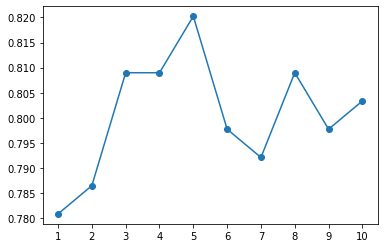

In [14]:
# No eixo x teremos o número de vizinhos e no eixo y a acurácia
plt.plot(n_vizinhos, resultados, '-o')
# Definindo que no eixo x queremos exibir cada numero de vizinhos
plt.xticks(n_vizinhos);

Isso que acabamos de fazer é chamado otimização de hiperparâmetro (ou *hyperparameter tuning*) e é necessário para sabermos que estamos extraindo o melhor possível do nosso modelo.

<hr>

Chegamos agora ao fim do conteúdo curso de introdução a ciência de dados. Evidentemente muitas coisas não foram mencionadas no decorrer do curso por se tratarem de tecnicas mais avançadas, porém o material que foi exposto apresenta o suficiente para uma pessoa começar no mundo da ciência de dados. Existem várias outras técnicas de análise, pré-processamento e algortimos de aprendizado de máquina, mas com o que vimos aqui já é possível atacar um problema do começo ao fim!